In [ ]:
%matplotlib inline

In [ ]:
pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.1 MB/s eta 0:00:00


In [ ]:
# import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from IPython.display import clear_output
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import requests
import os
import requests
import torch
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import tensorflow
from tqdm import tqdm
from PIL import Image as Img
from tensorflow.keras import Input
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from keras.optimizers import RMSprop

import tensorflow as tf
from tensorflow.keras import layers, models

from diffusers import StableDiffusionImg2ImgPipeline

from transformers import CLIPProcessor, CLIPModel


model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

# Deep Learning
## Final Project

## Project name: Self-canibalism in AI or Model collapse. Exploratory study


## Project author: Kamen Dimitrov

### Abstract

This paper investigates the phenomenon of Model Collapse within Generative Adversarial Networks (GANs) trained on synthetic data. Through experimentation with GAN models and analysis of training dynamics, there were observed instances where the discriminator outperforms the generator, leading to stagnation in model improvement. The current study underscores the importance of discerning and addressing issues related to Model Collapse, particularly in the context of synthetic data training. Additionally, the paper explores the role of CLIP (Contrastive Language-Image Pre-Training) and its internal biases. By exploring the interplay between synthetic data, GAN models, and CLIP, this study aims to deepen understanding of the opportunities and challenges in AI model development.

### Introduction
As the world moves through the period sometimes referred to as the "AI Spring" the lives of everyday people are changed in many interesting ways (Entefy, 2023). From our parents randomly finding out doggy websites that offer free image enhancers in exchange for all of their private information (Magic Swap Puzzle, 2024), to bright new developers generating unholy AI generated "art" on OnlyFans (Fanvue,2024). What is common between these two examples (and many others) is that they both include AI generated content being uploaded onto our precious collective internet. In fact, according to this article (Valyaeva, 2023) until August 2023 about 15.4 billion AI generated images were uploaded to the internet. A key point from the same article is the observation that "it took photographers 150 years, from the first photograph taken in 1826 until 1975, to reach the 15 billion mark"(Valyaeva, 2023).This surge in AI-generated content underscores a crucial point: the internet is becoming inundated with computer-generated material at an unprecedented rate.

Why does this matter? Well, for us AI engineers, the crux lies in the training data. Major AI models heavily rely on data sourced from the internet, and as the prevalence of AI-generated content increases, so does the reliance on such material for model training. This creates a feedback loop wherein newer models are trained on AI-generated images, subsequently producing more AI data that feeds back into the cycle. This phenomenon, known as "Model collapse" (Shumailov et al., 2023; Liu & Kühr, 2023), presents a pressing concern within the AI community.

This paper aims to address another critical issue raised by scientists: the reinforcement of biases through these processes. We will explore whether inherent biases exist within contemporary state-of-the-art models and examine the potential consequences of amplifying these biases to their extremes. Let's get started!

### 1. Going into details
To begin, lets have a look at the following image:

[![AI generated images based on model](https://i0.wp.com/journal.everypixel.com/wp-content/uploads/2023/08/Number-of-AI-images-1.png?resize=1024%2C576&ssl=1)](https://i0.wp.com/journal.everypixel.com/wp-content/uploads/2023/08/Number-of-AI-images-1.png?resize=1024%2C576&ssl=1)

Yes, it is a pie chart, get over it. What is more important here is that a vast majority of the images currently being uploaded on the internet are from a single model -  Stable diffusion. For the purposes of this project, we will focus on investigating its structure and what bias we can find there. Additionally, we'll dedicate a section to training another model using synthetic data and analyzing the outcomes.

Examining the image below provides us with valuable insights into Stable Diffusion's operational framework. Notably, it leverages CLIP (Contrastive Language-Image Pre-Training) as a fundamental component (Radford et al., 2021).

<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/State_of_AI_Art_Machine_Learning_Models.svg" alt="Diagram of models" width="1200">

In fact, other models such as DALL-E also rely on CLIP for their text-to-image encoding.

### 2. CLIP and its biases
In their original paper on CLIP, the authors noted the model's struggle with words possessing double meanings, emphasizing the importance of modifying prompts to ensure high-quality results (Radford et al., 2021). An interesting experiment we can do is judge the model's certainty on subjective words like the ones we use for emotions. Here is an example:


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Lasagne_-_stonesoup.jpg/800px-Lasagne_-_stonesoup.jpg" alt="Lazagna" width="800">

Among the words listed below, which do you think best fits the mood of the image?

1. Anger
2. Sadness
3. Joy
4. Hate
5. Fear

At first glance, this question might seem nonsensical. However, it provides an opportunity to query CLIP and gauge its interpretation:

In [ ]:
def Clip_ans(list_of_words, image_url):

#     url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Lasagne_-_stonesoup.jpg/800px-Lasagne_-_stonesoup.jpg"
    image = Image.open(requests.get(image_url, stream=True).raw)
#     emotions = ["Anger", "Sadness", "Joy","Hate","Fear"]
    inputs = processor(text=list_of_words, images=image, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
    return probs

In [ ]:
emotions = ["Anger", "Sadness", "Joy","Hate","Fear"]
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Lasagne_-_stonesoup.jpg/800px-Lasagne_-_stonesoup.jpg"
coefs = Clip_ans(emotions, url)
for i in range(0, len(emotions)) :
    print(f'{emotions[i]} - {round(coefs[0][i].item()*100,2)}%')

Anger - 21.95%
Sadness - 45.71%
Joy - 2.34%
Hate - 22.38%
Fear - 7.62%


That is one sad Lazagna, but lets add another word in the list and see what happens:

In [ ]:
emotions = ["Anger", "Sadness", "Joy","Hate","Fear",'Hunger']
coefs = Clip_ans(emotions, url)
for i in range(0, len(emotions)) :
    print(f'{emotions[i]} - {round(coefs[0][i].item()*100,2)}%')

Anger - 2.65%
Sadness - 5.52%
Joy - 0.28%
Hate - 2.7%
Fear - 0.92%
Hunger - 87.93%


The objective of this small experiment is to highlight a straightforward function of CLIP: it takes an image and a piece of text as input and produces a numerical output. Initially, the implications of this might not be immediately apparent. However, let's explore another example to illustrate potential concerns. Given that we're dealing with numerical outputs, let's consider an example related to identifying "the happiest face."

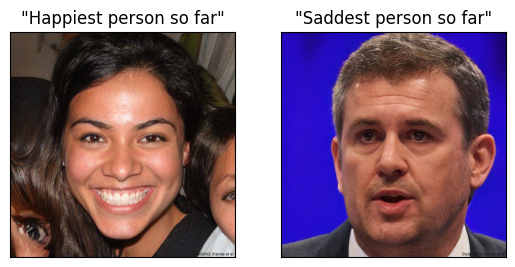

Number of images we have gone through so far 100 out of 100


In [ ]:
maxed_happy = 0
maxed_sad = 0
people_total = 100
for i in range(0,people_total):
    image = Image.open(requests.get("https://thispersondoesnotexist.com", stream=True).raw)
    inputs = processor(text=["happy", "sad"], images=image, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

    if probs[0][0].item() > maxed_happy:
        maxed_happy = probs[0][0].item()
        image.save('Maxed_happy_person.jpg')

    if probs[0][1].item() > maxed_sad:
        maxed_sad = probs[0][1].item()
        image.save('Maxed_Sad_person.jpg')
    clear_output(wait=True)

    image_data_happy = imread('Maxed_happy_person.jpg')
    image_data_sad = imread("Maxed_Sad_person.jpg")
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Initialize image plots
    im1 = ax1.imshow(image_data_happy)
    ax1.set_title('"Happiest person so far"')
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)


    im2 = ax2.imshow(image_data_sad)
    ax2.set_title('"Saddest person so far"')
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)


    plt.show()
    print(f"Number of images we have gone through so far {i+1} out of {people_total}")

By having a number to each image we can quantify abstract words like "happy" or "sad". We could run the same experiment with words like "criminal", "nurse" etc. Lets run one last experiment with the parameters below:  

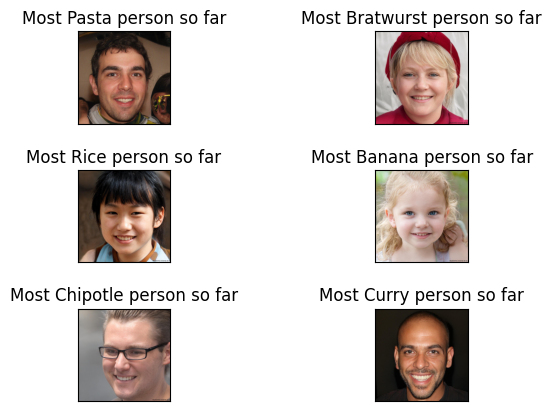

Number of images we have gone through so far 50 out of 50


In [ ]:
maxed_pasta = 0
maxed_rice = 0
maxed_chipotle = 0
maxed_bratwurst = 0
maxed_banana = 0
maxed_curry = 0


people_total = 50
for i in range(0,people_total):
    image = Image.open(requests.get("https://thispersondoesnotexist.com", stream=True).raw)
    inputs = processor(text=["pasta", "rice", "chipotle", "bratwurst","banana","curry"], images=image, return_tensors="pt", padding=True)

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

    if probs[0][0].item() > maxed_pasta:
        maxed_pasta = probs[0][0].item()
        image.save('Maxed_pasta_person.jpg')

    if probs[0][1].item() > maxed_rice:
        maxed_rice = probs[0][1].item()
        image.save('Maxed_rice_person.jpg')

    if probs[0][2].item() > maxed_chipotle:
        maxed_chipotle = probs[0][2].item()
        image.save('Maxed_chipotle_person.jpg')

    if probs[0][3].item() > maxed_bratwurst:
        maxed_bratwurst = probs[0][3].item()
        image.save('Maxed_bratwurst_person.jpg')

    if probs[0][4].item() > maxed_banana:
        maxed_banana = probs[0][4].item()
        image.save('Maxed_banana_person.jpg')

    if probs[0][5].item() > maxed_curry:
        maxed_curry = probs[0][5].item()
        image.save('Maxed_curry_person.jpg')

    clear_output(wait=True)

    im_pasta = imread('Maxed_pasta_person.jpg')
    im_rice = imread("Maxed_rice_person.jpg")
    im_chipotle = imread('Maxed_chipotle_person.jpg')
    im_bratwurst = imread("Maxed_bratwurst_person.jpg")
    im_banana = imread('Maxed_banana_person.jpg')
    im_curry  = imread('Maxed_curry_person.jpg')

    fig, (ax1, ax2,ax3) = plt.subplots(3, 2)
    for ax in [ax1, ax2, ax3]:
        ax[0].xaxis.set_visible(False)
        ax[0].yaxis.set_visible(False)
        ax[1].xaxis.set_visible(False)
        ax[1].yaxis.set_visible(False)
    # Initialize image plots
    im1 = ax1[0].imshow(im_pasta)
    ax1[0].set_title('Most Pasta person so far')

    im2 = ax2[0].imshow(im_rice)
    ax2[0].set_title('Most Rice person so far')

    im3 = ax3[0].imshow(im_chipotle)
    ax3[0].set_title('Most Chipotle person so far')

    im4 = ax1[1].imshow(im_bratwurst)
    ax1[1].set_title('Most Bratwurst person so far')

    im5 = ax2[1].imshow(im_banana)
    ax2[1].set_title('Most Banana person so far')

    im6 = ax3[1].imshow(im_curry)
    ax3[1].set_title('Most Curry person so far')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()
    print(f"Number of images we have gone through so far {i+1} out of {people_total}")

*A little sidenote* - at this point it is important to note that this technically is text-to-image generator. By utilizing a specific prompt and repeatedly querying the website "thispersondoesnotexist.com," one can iterate through generated faces until finding one with a high score relative to the original input.

As previously discussed, CLIP plays a pivotal role within contemporary state-of-the-art diffusion models. Its primary function involves embedding the provided text into a latent space. Subsequently, the models generate images based on the positioning of this text within the latent space. This mechanism underscores the interplay between textual input and image generation within these advanced models.


The primary objective of this paper is to conduct a straightforward investigation into the phenomenon of Model Collapse. This exploration involves training a GAN model on artificial data and providing observations on the resultant output. The overarching expectation is for the model to detect inherent biases within the training data and potential irregularities. Many of the artificial faces within the training dataset exhibit anomalies such as unusual patterns or inaccurate background details.

The significance of this study, and others like it, becomes evident when considering the rising prevalence of fake profiles across the internet. These profiles often utilize faces generated from platforms like "thispersondoesnotexist.com" (Carmichael, 2021; O'Sullivan, 2020). Such synthetic faces can inadvertently be assimilated by web crawlers and subsequently employed as training data for future AI models. This underscores the critical role of scrutinizing and understanding the implications of synthetic data generation within the broader context of AI development and internet culture.

### 3. Exploring model collapse

Lets begin by acquiring some synthetic data that we can explore and work with. Since we have some examples above with pictures from "thispersondoesnotexist.com" we can just collect some data from there using the code below:

In [ ]:
# for i in range(0,10000):
#     image = Image.open(requests.get("https://thispersondoesnotexist.com", stream=True).raw)
#     image.save(f'Data/training_sample-{i}.jpg')

Although 10 000 could be a bit too many images to train on, the website itself does not have a limit to how many faces it can generate. However, we don't need to use the full size of the images, so we can resize them using the code below:

In [ ]:
# for pic in os.listdir('Data'):
#     image = Image.open(f'Data/{pic}')
#     image.resize((128,128)).save(f"data_resized/{pic}")

Since we have the data resized and ready, we can explore it a little bit. Just by browsing the thumbnails of the files we begin to see some faces that seem a little off...

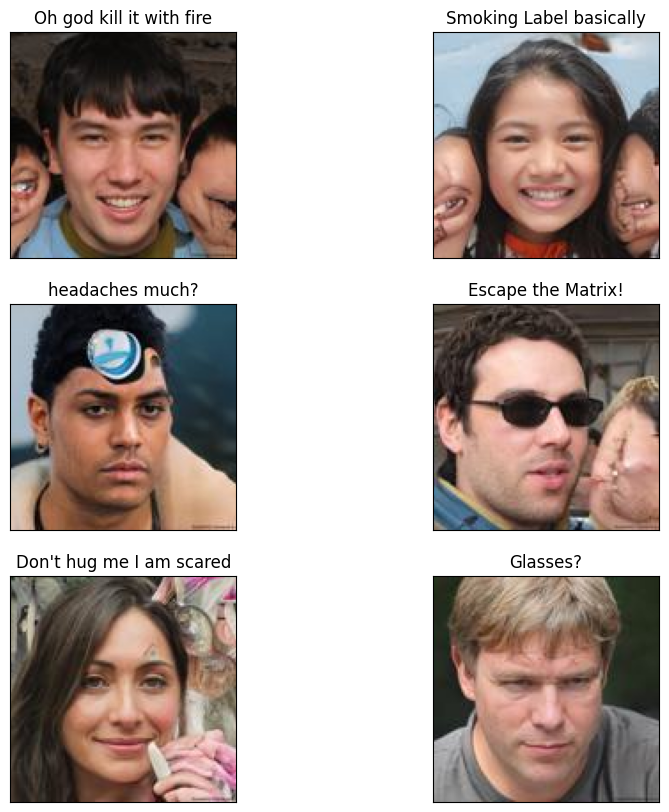

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 2, figsize=(10, 10))

# plt.figure(figsize=(10,6))
for ax in [ax1, ax2, ax3]:
    ax[0].xaxis.set_visible(False)
    ax[0].yaxis.set_visible(False)
    ax[1].xaxis.set_visible(False)
    ax[1].yaxis.set_visible(False)
# Initialize image plots
im1 = ax1[0].imshow(Image.open('data_resized/training_sample-82.jpg'))
ax1[0].set_title('Oh god kill it with fire')

im2 = ax2[0].imshow(Image.open('data_resized/training_sample-162.jpg'))
ax2[0].set_title('headaches much?')

im3 = ax3[0].imshow(Image.open('data_resized/training_sample-351.jpg'))
ax3[0].set_title("Don't hug me I am scared")

im4 = ax1[1].imshow(Image.open('data_resized/training_sample-345.jpg'))
ax1[1].set_title('Smoking Label basically')

im5 = ax2[1].imshow(Image.open('data_resized/training_sample-354.jpg'))
ax2[1].set_title('Escape the Matrix!')

im6 = ax3[1].imshow(Image.open('data_resized/training_sample-576.jpg'))
ax3[1].set_title('Glasses?')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

Did I say a little? Well these were some of the more extreme examples but majority of the images are wrong in the very subtle details - backgrounds, existance of certain garments, asymetries etc. These are the small details that one well trained model on this synthetic data is expected to pick up on. Also the obvious text at the bottom of the image saying StyleGAN2...

#### Creating the model

GAN or Generative Adversarial Network is essential two models, one that tries to create fake images and one that tries to detect which images are real and which are fake. Eventually the generator becomes so good at creating fake images that the discriminator cannot differentiate real images from fake ones. StyleGAN works in the exact same way (but with different artchitecture than the one we would use).

For the purposes of this project, we went with a very basic structure for both the discriminator and the generator.

In [ ]:
LATENT_DIM = 32
CHANNELS = 3
WIDTH = 128
HEIGHT = 128
def build_generator(latent_dim, img_shape):
    model = models.Sequential()
    model.add(layers.Dense(128 * 16 * 16, activation="relu", input_dim=latent_dim))
    model.add(layers.Reshape((16, 16, 128)))
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"))
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", activation="relu"))
    model.add(layers.Conv2DTranspose(img_shape[2], kernel_size=4, strides=2, padding="same", activation="tanh"))
    return model

In [ ]:
def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2D(256, kernel_size=4, strides=2, padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation="sigmoid"))
    return model

In [ ]:
def build_dcgan(generator, discriminator):
    discriminator.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=["accuracy"])
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return model

In [ ]:
img_shape = (128, 128, 3)
latent_dim = 100


discriminator = build_discriminator(img_shape)

generator = build_generator(latent_dim, img_shape)

dcgan = build_dcgan(generator, discriminator)

generator.summary()
discriminator.summary()
dcgan.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32768)             3309568   
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 128)       262272    
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 64, 64, 64)        131136    
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 128, 128, 3)       3075      
 Transpose)                                                      
                                                      

The following model looks simple which for now is good enough. Implications of this simplicity will be discussed later. Now lets load some data and see the result

In [ ]:
dataset_arr =[]
for pic_file in os.listdir('data_resized'):
    pic = Image.open(f'data_resized/{pic_file}')
    dataset_arr.append(np.uint8(pic))

In [ ]:
dataset_arr = dataset_arr[:3936] #taking only part of the pictures to train on due to computational limits

In [ ]:
# import zipfile
# with zipfile.ZipFile('data_resized.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [ ]:
# len(dataset_arr)

6727

Now that we have the synthetic data ready we can train the model itself using the code below. At least this code was used over multiple atempts to train the model with varying degrees of success. The cell itself can be skiped.

In [ ]:
batch_size = 64
epochs = 3000

image_list = np.array(dataset_arr)  # Convert to numpy array if not already
image_list = image_list.astype('float32') / 255.0

# Convert the list of images into a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices(image_list).batch(batch_size)

# Define a function to train the DCGAN model
def train_dcgan(dcgan, dataset, latent_dim, epochs):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for batch in dataset:
            # Train the discriminator
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator(noise)
            real_images = batch
            combined_images = tf.concat([fake_images, real_images], axis=0)
            labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0) # Labels for fake and real images
            labels += 0.05 * tf.random.uniform(tf.shape(labels)) # Adding noise to labels
            discriminator_loss = discriminator.train_on_batch(combined_images, labels)

            # Train the generator
            noise = tf.random.normal((batch_size, latent_dim))
            misleading_labels = tf.ones((batch_size, 1)) # Misleading labels for generator
            generator_loss = dcgan.train_on_batch(noise, misleading_labels)

        # Print losses every few epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}: Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")
        if (epoch + 1) % 400 == 0:
            checkpoint_dir = './generator_checkpoint'
            checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
            generator.save_weights(checkpoint_prefix)


# Train the DCGAN model
train_dcgan(dcgan, dataset, latent_dim, epochs)

Epoch 1/4000


KeyboardInterrupt: 

In [ ]:
checkpoint_dir = './generator_checkpoint'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

def save_generator_checkpoint(generator, checkpoint_prefix):
    generator.save_weights(checkpoint_prefix)

save_generator_checkpoint(generator, checkpoint_prefix)

In [ ]:
def generate_and_plot_images(generator, latent_dim, num_images=16, figsize=(10, 10)):
    noise = tf.random.normal((num_images, latent_dim))
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_images[i] * 0.5 + 0.5)  # Denormalize the image for display
        plt.axis('off')
    plt.show()

As training GANs takes a lot of time we can just look at some specific checkpoints and talk about the outputs from there. First lets have a look at the output from 500 epochs with 32 batchsize:

1/1 [==============================] - 1s 605ms/step


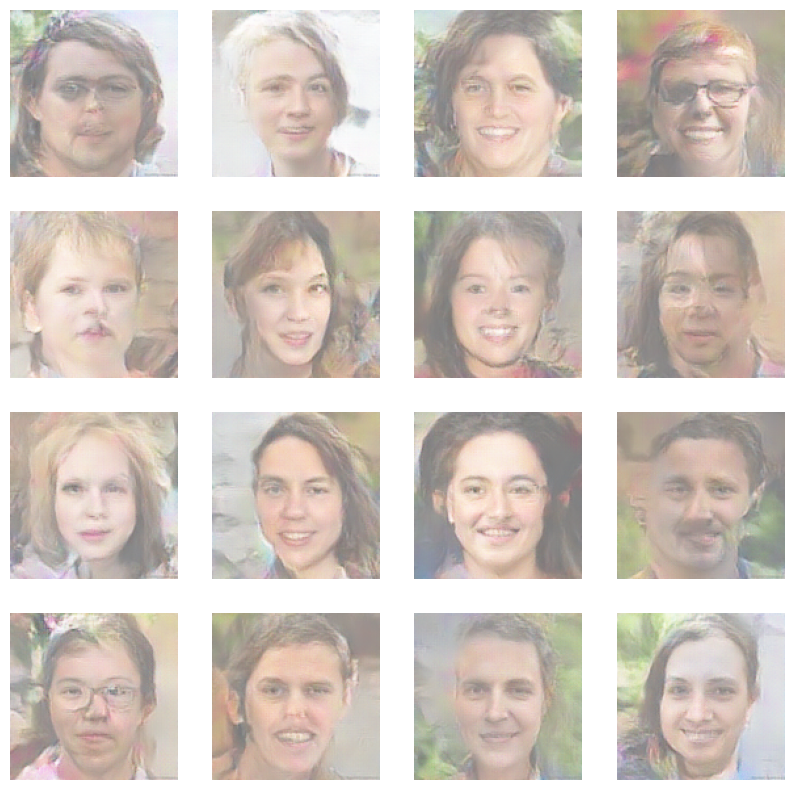

In [ ]:
generator.load_weights('Checkpoints/400/ckpt')
generate_and_plot_images(generator, latent_dim)

What is good about this set of images is that with relatively low number of epochs we were able to get some at least visible facial strucutre. This now begs the question of how can we get even better faces?

1/1 [==============================] - 0s 417ms/step


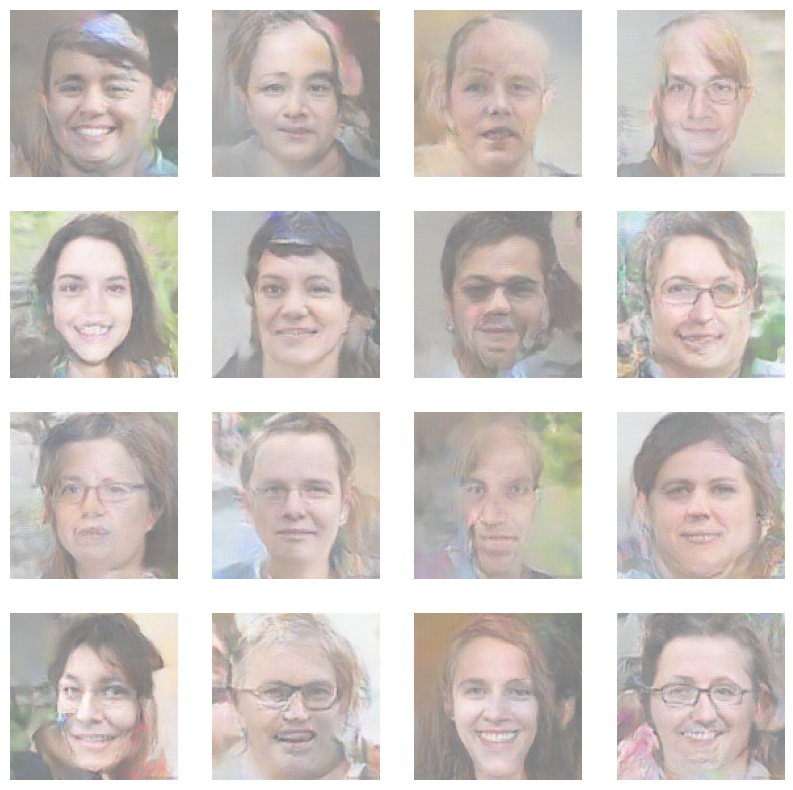

In [ ]:
generator.load_weights('Checkpoints/500/ckpt')
generate_and_plot_images(generator, latent_dim)

It is hard to tell if after 100 more epochs the faces got better or worse. It is also too early to discuss patterns just yet. Lets run a longer test with larger batchsize and more training data. This time the training data was 1920 images in batches of 64 for 3000 epochs (don't ask how this was ran)

1/1 [==============================] - 0s 183ms/step


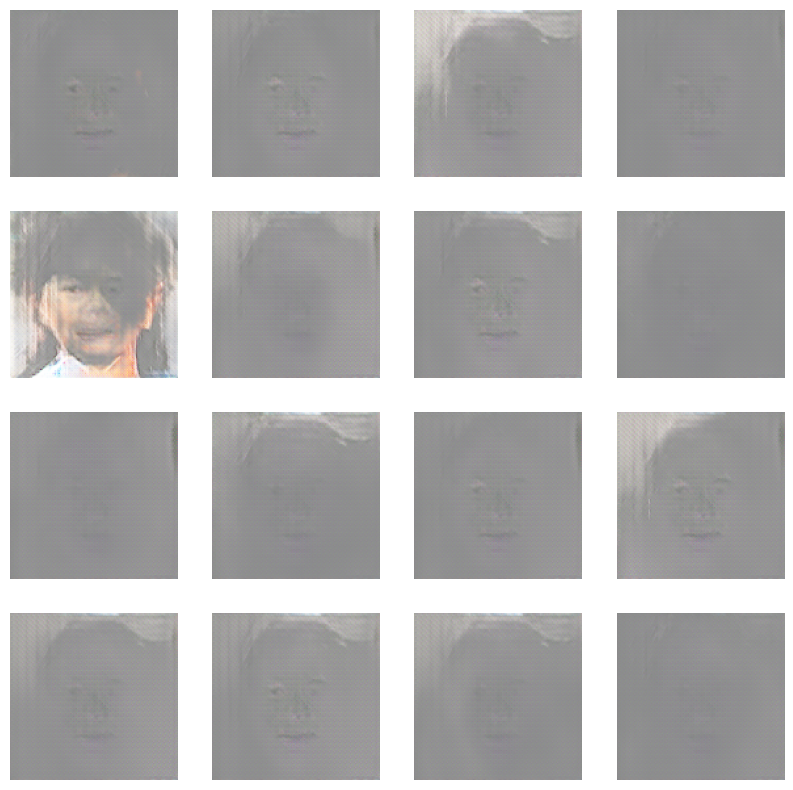

In [ ]:
generator.load_weights('Checkpoints/3000/ckpt')
generate_and_plot_images(generator, latent_dim)

Mmmm, delicious nightmare fuel. Well after some of the epochs what might have happened was that the discriminator got too good and the generator was not able to improve (Arjovsky & Bottou, 2017), that is a consequence of the relative simplicity of our generator model and revising the generator's architecture could be a way to mitigate this issue. Another approach could be to use a Wasserstein GAN or WGAN, which differs from the standard GAN by having the discriminator act more like a critic and assiging a number to each image, and the generator tries to generate images with a high score (Arjovsky, Chintala, & Bottou, 2017). Unfortunatelly, this main issue could not be attributed to the quality of the data. What could be attributed to the quality of the data is for example in epoch 400 and 500, the face (most notably the eyes) are all in the same position on the image. If we have a look at the training data, the StyleGAN2 does generate faces with fixed position of the eyes. What this means for the future models (which are trained better than the one here) is that we may see future fake profiles retain the position of their facial features. Less work for the Fake Image detectors as this is an easy pattern to catch.

That said, there are currently many models being trained on synthetic data with good results (OpenJorney, 2024). Synthetic data can be a powerful tool

### 4. Conclusion

In conclusion, as we move towards a more automated future, the ratio of synthetic data to real data is likely to increase. This study sheds light on the implications of training AI models on synthetic data, highlighting the potential risks of Model Collapse within Generative Adversarial Networks (GANs). While synthetic data offers scalability and privacy advantages, it does not do so without potential risks. Moving forward, further research is essential to refine discriminator models, enhance generator architectures, and address the challenges posed by Model Collapse. This paper was also heavily inspired by a great lecture by Liu, T. and Kühr L. (2023) which is a must-watch for anyone seeking a more in-depth look into biases within the diffusion models themselves.

### 5. Future research

There are several areas which this research can propose as needing further exploration

1. Building a robust discriminator of real and synthetic data. Such discriminators would probably be very valuable (and even likely a mandatory step) in the process of data preparation for the AI models of the future.
2. Building a more complex generator to explore further the effects of training on synthetic data
3. Investigating techniques to address Model Collapse in GANs and similar architectures, particularly when trained on synthetic data

By addressing these research directions, we can gain a deeper understanding of the opportunities and challenges associated with synthetic data usage in AI, ultimately advancing the development of more robust and reliable artificial intelligence systems.

### 6. References:

1. Arjovsky, M., Bottou, L., & Chintala, S. (2017). Wasserstein GAN. Retrieved from https://arxiv.org/abs/1701.07875

2. Arjovsky, M., & Bottou, L. (2017). Towards principled methods for training generative adversarial networks. Retrieved from https://arxiv.org/pdf/1701.04862.pdf

3. Carmichael, F. (2021, August 5). How a fake network pushes pro-China propaganda. BBC News. Retrieved from https://www.bbc.com/news/world-asia-china-58062630

4. Entefy. (2023, July 31). 2 AI winters and 1 hot AI summer. Retrieved from https://www.entefy.com/blog/2-ai-winters-and-1-hot-ai-summer/

5. Liu, T.-C., & Kühr, L.-E. (2023). Self-cannibalizing AI: Artistic strategies to expose generative text-to-image models. Retrieved from https://media.ccc.de/v/37c3-12125-self-cannibalizing_ai#t=2444

6. MagicSwapPuzzle (2024). Retrieved from: https://www.facebook.com/gaming/play/500961157334728

6. OpenJourney (2024). Retrieved from https://openjourney.art

7. O'Sullivan, D. (2020, February 20). How fake faces are being weaponized online. CNN Business. Retrieved from https://edition.cnn.com/2020/02/20/tech/fake-faces-deepfake/index.html

8. Radford, A., Kim, J. W., Hallacy, C., Ramesh, A., Goh, G., Agarwal, S., ... Sutskever, I. (2021, February 26). Learning transferable visual models from natural language supervision. Retrieved from https://openai.com/research/clip

9. Shumailov, I., Shumaylov, Z., Zhao, Y., Gal, Y., Papernot, N., & Anderson, R. (2023, May). The curse of recursion: Training on generated data makes models forget. Retrieved from https://arxiv.org/pdf/2305.17493.pdf

10. Valyaeva, A. (2023, August 15). AI has already created as many images as photographers have taken in 150 years: Statistics for 2023. Retrieved from https://journal.everypixel.com/ai-image-statistics

